In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['housing.csv']


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
# Load the Boston housing dataset

df = pd.read_csv('../input/housing.csv',sep=",")

# Exploratory Data Analysis(EDA)

In this first section of this project, we will make a cursory investigation about the Boston housing data and provide our observations. Familiarizing ourself with the data through an explorative process is a fundamental practice to help us better understand and justify our results.


In [3]:
df.head()

RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0

# Checking if any column have null data

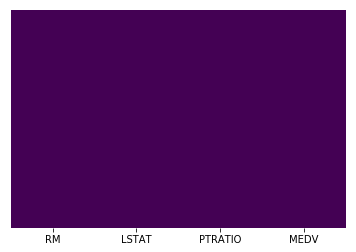

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

In [5]:
#it state that any column doesnt have any null value.

# Describing housing_data for statistic metrics

In [6]:
df.describe()

RM       LSTAT     PTRATIO          MEDV
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06

# Visualization of data

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


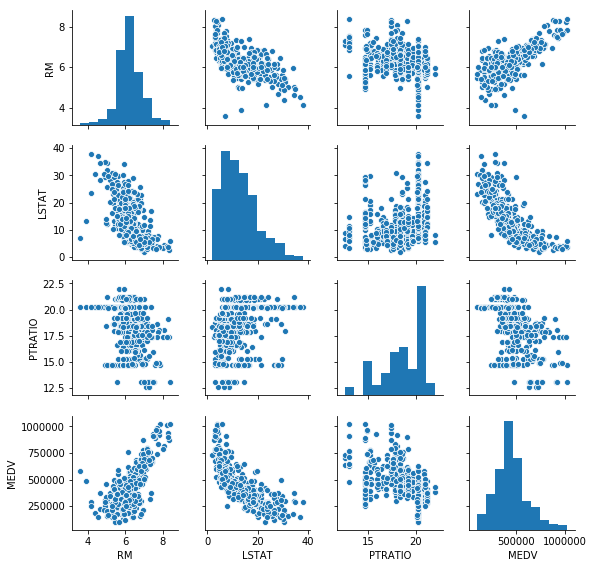

In [8]:
sns.pairplot(df,size=2);

 **Feature Observation**:
           As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

**'RM'** is the average number of rooms among homes in the neighborhood.
**'LSTAT'** is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
**'PTRATIO'** is the ratio of students to teachers in primary and secondary schools in the neighborhood

# Correlation Analysis for Feature Selection

In [9]:
df.corr()  #for finding best feature

RM     LSTAT   PTRATIO      MEDV
RM       1.000000 -0.612033 -0.304559  0.697209
LSTAT   -0.612033  1.000000  0.360445 -0.760670
PTRATIO -0.304559  0.360445  1.000000 -0.519034
MEDV     0.697209 -0.760670 -0.519034  1.000000

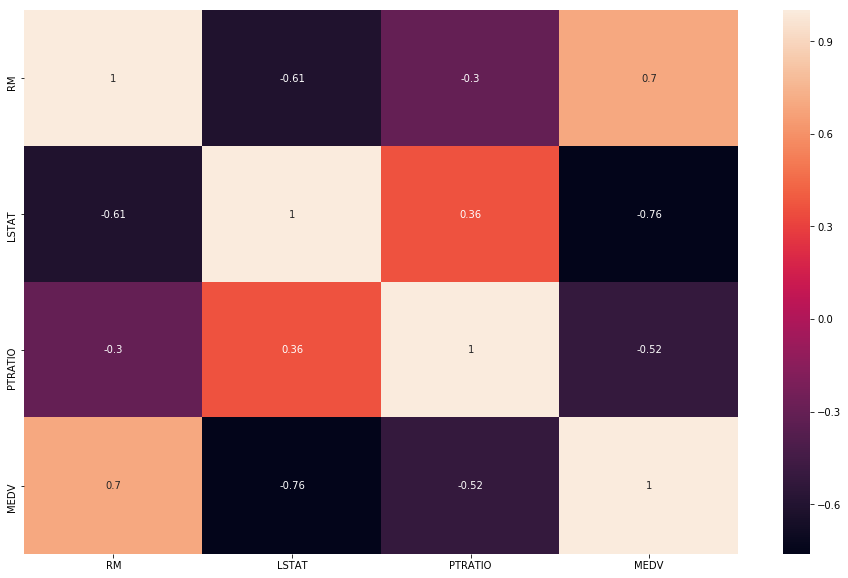

In [10]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True);

In this first section of this project, we will make a cursory investigation about the Boston housing data and provide our observations. Familiarizing ourself with the data through an explorative process is a fundamental practice to help us better understand and justify our results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features and the target variable.** The features, **'RM', 'LSTAT','PTRATIO'**, give us quantitative information about each data point,they are stored in **'y'** variable. The target variable, **'MEDV'**, will be the variable we seek to predict. These are stored in **'X'** variable.



In [11]:
X = df[['LSTAT','RM','PTRATIO']] #select feature
y = df[['MEDV']].values   #select target var
y = y.reshape(-1,1)

# Applying Scikit learn Linear Regression based on 3 independent columns 'RM','LSAT','PTRATIO' to predict value of dependent variable 'MEDV'


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [14]:
#create linear regression object
lm = LinearRegression()  


In [15]:
#train the model using training set
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
#make prediction using the training set first
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#the mean squared error,lower the value better, if it is a .0 means perfect prediction
s = mean_squared_error(y_train,y_train_pred)
print("Mean Squared error of training set :%2f"%s)


Mean Squared error of training set :8031222777.185911


In [18]:
#the mean squared error,lower the value better it is .0 means perfect prediction
s = mean_squared_error(y_test,y_test_pred)
print("Mean squared error of testing set: %.2f"%s)

Mean squared error of testing set: 7048219280.22


In [19]:
from sklearn.metrics import r2_score

# Explained variance score: 1 is perfect prediction
s = r2_score(y_train, y_train_pred)
print('R2 variance score of training set: %.2f' %s )


R2 variance score of training set: 0.72


In [20]:
#explained the variance score :1 is perfect prediction
s = r2_score(y_test,y_test_pred)
print("R2 variance score of testing set: %2f"%s)


R2 variance score of testing set: 0.691005


In [21]:
#calculating adjusted r2
N = y_test.size
p = X_train.shape[1]
adjr2score = 1 - ((1-r2_score(y_test, y_test_pred))*(N - 1))/ (N - p - 1)
print("Adjusted R^2 Score %.2f" % adjr2score)

Adjusted R^2 Score 0.68


# Polynomial Regression

In [22]:
#import polynomial package
from sklearn.preprocessing import PolynomialFeatures

In [23]:
#creat a polynomial regression model for the given degree=2
poly_reg = PolynomialFeatures(degree = 2)

In [24]:
#transform the existing feature to high degree features.
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

In [25]:
#fit the transform features to linear regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train_poly,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
#predicting on training data set 
y_train_predict = lin_reg_2.predict(X_train_poly)
#predicting on testing data set
y_test_predict = lin_reg_2.predict(X_test_poly)

In [27]:
#ealuating the model on train dataset
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predict))
r2_train = r2_score(y_train,y_train_predict)
print("The model performance of training set")
print("---------------------------------------------")
print("RMSE of training set is{}".format(rmse_train))
print("R2 score of training set is{}".format(r2_train))

The model performance of training set
---------------------------------------------
RMSE of training set is68920.99023260795
R2 score of training set is0.8355858250276694


In [28]:
#evaluating model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_predict))
r2_test = r2_score(y_test,y_test_predict)

print("The model performance of training set")
print("-----------------------------------------------")
print("RMSE of testing set is{}".format(rmse_test))
print("R2 score of testing set is{}".format(r2_test))

The model performance of training set
-----------------------------------------------
RMSE of testing set is62384.1661367507
R2 score of testing set is0.8293837402027118


# Quadratic 

In [29]:
#import polynomial package
from sklearn.preprocessing import PolynomialFeatures

In [30]:
#creat a polynomial regression model for the given degree=3
poly_reg = PolynomialFeatures(degree = 3)

In [31]:
#transform the existing feature to high degree features.
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

In [32]:
#fit the transform features to linear regression
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_train_poly,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
#predicting on training data set 
y_train_predict = lin_reg_3.predict(X_train_poly)
#predicting on testing data set
y_test_predict = lin_reg_3.predict(X_test_poly)

In [34]:
#ealuating the model on train dataset
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predict))
r2_train = r2_score(y_train,y_train_predict)
print("The model performance of training set")
print("----------------------------------------------")
print("RMSE of training set is{}".format(rmse_train))
print("R2 score of training set is{}".format(r2_train))

The model performance of training set
----------------------------------------------
RMSE of training set is66301.48706859568
R2 score of training set is0.8478462085483496


In [35]:
#evaluating model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_predict))
r2_test = r2_score(y_test,y_test_predict)

print("The model performance of testing set")
print("--------------------------------------------")
print("RMSE of testing set is{}".format(rmse_test))
print("R2 score of testing set is{}".format(r2_test))

The model performance of testing set
--------------------------------------------
RMSE of testing set is62754.74069898846
R2 score of testing set is0.8273507296661979


# Applying Gradient Descent

In [36]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1,1)).flatten()

In [37]:
X_std.shape

(489, 3)

In [38]:
import numpy as np
alpha = 0.0001    #learning rate
w_ = np.zeros(1 + X_std.shape[1])    
cost_ = [] 
n_ = 100
 
for i in range(n_):
    y_pred = np.dot(X_std,w_[1:] + w_[0])
    errors  = (y_std - y_pred)
    
    w_[1:] +=alpha * X_std.T.dot(errors)   #theta1
    w_[0] +=alpha *errors.sum()        #theta0
    
    cost = (errors**2).sum() / 2.0
    cost_.append(cost)

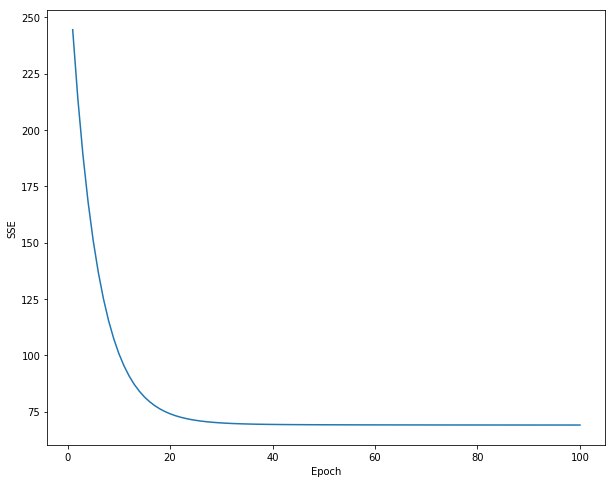

In [39]:
plt.figure(figsize=(10,8))  #plot the figure
plt.plot(range(1,n_ + 1),cost_);
plt.ylabel('SSE');
plt.xlabel('Epoch');

In [40]:
w_   #gradient function (intercept and coeficient) 

array([ 2.89439583e-15, -4.54897201e-01,  3.45402065e-01, -2.50972706e-01])

In [41]:
#accuracy of gradient function
print("Accuracy: %0.2f (+/- %0.2f)" % (w_.mean(), w_.std() * 2))


Accuracy: -0.09 (+/- 0.60)
